In [1]:
!pip install cowsay

You should consider upgrading via the '/Users/maksim/JupyterProjects/discrete_maths/envi/bin/python -m pip install --upgrade pip' command.


In [2]:
import cowsay
cowsay.stegosaurus('My name Jef')

  ___________
| My name Jef |
                   \
                    \
                     \
                      \
                                                / `.   .' "
                                        .---.  <    > <    >  .---.
                                        |    \  \ - ~ ~ - /  /    |
                    _____          ..-~             ~-..-~
                   |     |   \~~~\.'                    `./~~~/
                  ---------   \__/                        \__/
                 .'  O    \     /               /       \  "
                (_____,    `._.'               |         }  \/~~~/
                 `----.          /       }     |        /    \__/
                       `-.      |       /      |       /      `. ,~~|
                           ~-.__|      /_ - ~ ^|      /- _      `..-'
                                |     /        |     /     ~-.     `-. _  _  _
                                |_____|        |_____|         ~ - . _ _ _ _ _>


In [118]:
%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from networkx.algorithms.approximation import clique, vertex_cover
from networkx.algorithms.bipartite.covering import min_edge_cover

plt.rcParams["figure.figsize"] = (16, 9)

In [4]:
# pd.set_option('display.max_rows', 500)

### Preprocessing the 'Graph of Europe' data:
> Copy all European countries and read them into pandas.DataFrame

> Parse the table from "https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_land_borders", using IMPORT_HTML() from googlesheets

> Read 'Land borders' data into pandas.DataFrame and then filter by countries

In [5]:
Europe = nx.Graph()
countries = pd.read_csv('countries.csv')
Europe.add_nodes_from(countries['country'])

# TODO: try to recollect why I wrote this code
# sheet_id = '1XqOtPkiE_Q0dfGSoyxrH730RkwrTczcRbDeJJpqRByQ'
# sheet_name = 'borders'
# url = f'https://docs.google.com/spreadsheets/d' \
#     '/1AYODVslftthH3aI8gS0d4wgyLZwwXMpD4bQOSv5M4GI/gviz/tq?tqx=out:csv&sheet={sheet_name}'
# df = pd.read_csv(url)

In [6]:
doc_id = '1AYODVslftthH3aI8gS0d4wgyLZwwXMpD4bQOSv5M4GI'
url = url = f'https://docs.google.com/spreadsheets/d/{doc_id}/export?format=csv'
df = pd.read_csv(url)
df = df.drop([0], axis=0)
df

,Country or territory\n*(Territories without full sovereignty in italics)* [2],Total length of land borders,Unnamed: 2,No. of distinct land borders,No. of distinct land neighbours,Land border neighbours\nand border length\n\n*(Territories without full sovereignty in italics) [2](#) = No. of distinct \nland boundaries with that country or territory*
1,* Abkhazia*,382,237,2,2,Russia: 241 km (150 mi)\n Georgia: 141 km (88 mi)
2,* Afghanistan*,"5,529","3,436",6,6,People's Republic of China: 76 km (47 mi)\n Ir...
3,* Albania*,720,450,4,4,Greece: 282 km (175 mi)\n* Kosovo*:[4] 112 km ...
4,* Algeria*,"6,47","4,02",7,7,"Libya: 982 km (610 mi)\n Mali: 1,376 km (855 m..."
5,* Andorra*,120,75,2,2,France: 56.6 km (35.2 mi)\n Spain: 63.7 km (39...
...,...,...,...,...,...,...
201,* Vietnam*,"4,639","2,883",3,3,"Cambodia: 1,228 km (763 mi)\n People's Republi..."
202,* Western Sahara*[5],"2,046","1,271",3,3,"Algeria: 42 km (26 mi)\n Mauritania: 1,561 km ..."
203,* Yemen*,"1,746","1,085",2,2,"Oman: 288 km (179 mi)\n Saudi Arabia: 1,458 km..."
204,* Zambia*,"5,667","3,521",8,8,"Angola: 1,110 km (690 mi)\n Botswana: 0.15 km ..."


Have to drop and rename some columns 

In [7]:
df.columns

Index(['Country or territory\n*(Territories without full sovereignty in italics)* [2]',
       'Total length of land borders', 'Unnamed: 2',
       'No. of distinct land borders', 'No. of distinct land neighbours',
       'Land border neighbours\nand border length\n\n*(Territories without full sovereignty in italics) [2](#) = No. of distinct \nland boundaries with that country or territory*'],
      dtype='object')

In [8]:
borders = df.rename(columns={'Country or territory\n*(Territories'
                   ' without full sovereignty in italics)* [2]': 
                   'country',
                   'Land border neighbours\nand border'
                   ' length\n'
                   '\n*(Territories without full sovereignty in italics) '
                   '[2](#) = No. of distinct \nland boundaries with that country or territory*': \
                   'neighbours'
                  }).drop(['Total length of land borders', 'Unnamed: 2'
                           ,'No. of distinct land borders', 'No. of distinct land neighbours']
                        , axis=1)
borders['country'] = borders['country'].str.replace('*', '').str.strip()
borders['country'] = borders['country'].str.replace(r'\[([0-9_]+)\]', '', regex=True) \
    .str.replace(r'\(([0-9_])+\)', '', regex=True)
# borders['neighbours'] = borders['neighbours'].str.split('\n')
# Too lazy to reformat France and Netherlands automatically
borders.at[63, 'country'] = 'France'
borders.at[131, 'country'] = 'Netherlands'
borders

/var/folders/6d/jcsgnwtj1857x2zvzznd28jw0000gn/T/ipykernel_23555/1804519260.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  borders['country'] = borders['country'].str.replace('*', '').str.strip()


,country,neighbours
1,Abkhazia,Russia: 241 km (150 mi)\n Georgia: 141 km (88 mi)
2,Afghanistan,People's Republic of China: 76 km (47 mi)\n Ir...
3,Albania,Greece: 282 km (175 mi)\n* Kosovo*:[4] 112 km ...
4,Algeria,"Libya: 982 km (610 mi)\n Mali: 1,376 km (855 m..."
5,Andorra,France: 56.6 km (35.2 mi)\n Spain: 63.7 km (39...
...,...,...
201,Vietnam,"Cambodia: 1,228 km (763 mi)\n People's Republi..."
202,Western Sahara,"Algeria: 42 km (26 mi)\n Mauritania: 1,561 km ..."
203,Yemen,"Oman: 288 km (179 mi)\n Saudi Arabia: 1,458 km..."
204,Zambia,"Angola: 1,110 km (690 mi)\n Botswana: 0.15 km ..."


In [9]:
borders[['country']]

,country
1,Abkhazia
2,Afghanistan
3,Albania
4,Algeria
5,Andorra
...,...
201,Vietnam
202,Western Sahara
203,Yemen
204,Zambia


In [10]:
edges_df = countries.merge(borders, how='left')
edges_df['neighbours'] =  edges_df['neighbours'].str.split('\n')
edges_df['neighbours'] = edges_df['neighbours'].fillna("").apply(list)
# edges_df = edges_df.explode('neighbours')
edges_df

,country,neighbours
0,Armenia,"[Azerbaijan (6): 787 km (489 mi)[8], Georgia:..."
1,Albania,"[Greece: 282 km (175 mi), * Kosovo*:[4] 112 km..."
2,Andorra,"[France: 56.6 km (35.2 mi), Spain: 63.7 km (3..."
3,Austria,"[Czech Republic: 362 km (225 mi), Germany: 78..."
4,Belarus,"[Latvia: 141 km (88 mi), Lithuania: 502 km (3..."
5,Belgium,"[France: 620 km (390 mi), Germany (6):[12] 16..."
6,Bosnia and Herzegovina,"[Croatia (2): 932 km (579 mi), Montenegro: 22..."
7,Bulgaria,"[Greece: 494 km (307 mi), North Macedonia: 14..."
8,Croatia,"[Bosnia and Herzegovina (2): 932 km (579 mi), ..."
9,Cyprus,[* Akrotiri and Dhekelia*[20] (United Kingdom)...


In [11]:
for index, row in edges_df.iterrows():
    for neighbour in row['neighbours']:
        temp = neighbour.split(':')[0].replace('*', '')
        temp = re.sub("\[([0-9_]+)\]", "", temp)
        temp = re.sub("\(([0-9_])+\)", "", temp)
        temp = temp.strip()
        if temp in list(edges_df['country']):
            # print(row['country'], temp)
            Europe.add_edge(row['country'], temp)

In [119]:
# list(Europe.edges())

#### 1a

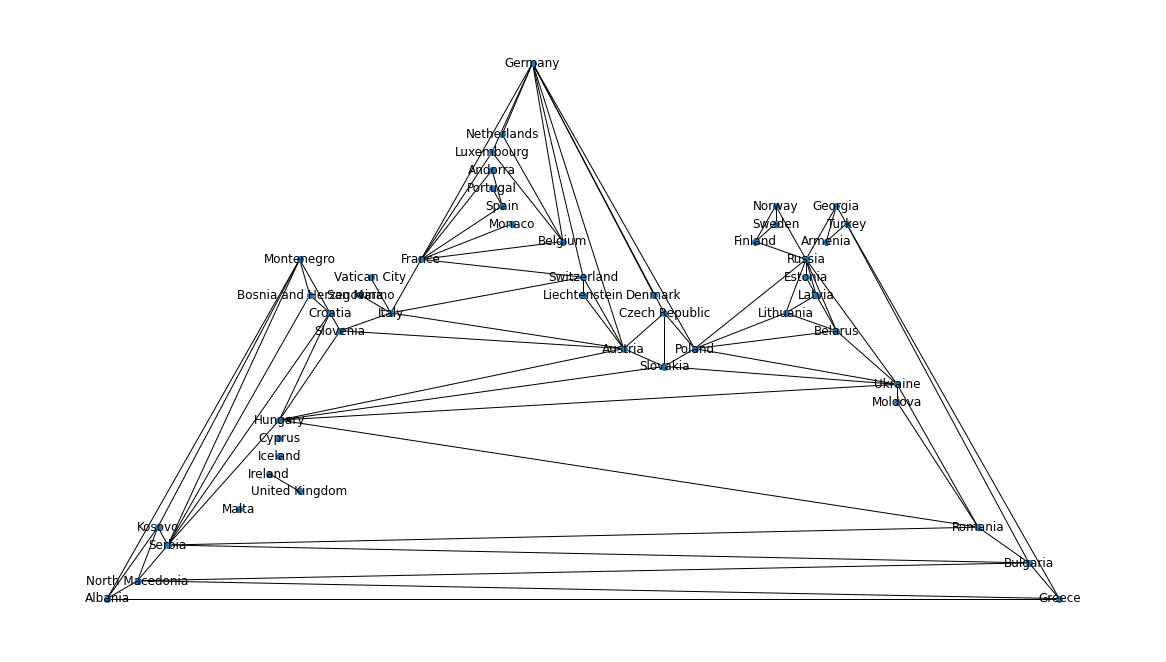

In [120]:
nx.draw_planar(Europe, node_size=None, with_labels=True)

#### 1b

In [14]:
G = Europe.subgraph(max(nx.connected_components(Europe)))

In [15]:
print('|V|:', Europe.number_of_nodes())
print('|E|:', Europe.number_of_edges())

min_graph_degree = 1
max_graph_degree = 0
# degree = 0 is too dull
for country, degree in Europe.degree():
    if degree != 0:
        min_graph_degree = min(min_graph_degree, degree)
        max_graph_degree = max(max_graph_degree, degree)
print('Minimal graph degree:', min_graph_degree)
print('Maximal graph degree:', max_graph_degree)

print('Diameter:', nx.diameter(G))

print('Girth:', min([len(cycle) for cycle in nx.cycle_basis(G)]))

print(f'\nCenter:', nx.center(G))
print('Minimum vertex cut:' \
      , nx.minimum_node_cut(G))
print('Minimum edge cut:' \
      , nx.minimum_edge_cut(G))  

|V|: 49
|E|: 92
Minimal graph degree: 1
Maximal graph degree: 9
Diameter: 8
Girth: 3

Center: ['Austria', 'Belarus', 'Croatia', 'Czech Republic', 'Germany', 'Hungary', 'Lithuania', 'Poland', 'Russia', 'Slovakia', 'Slovenia', 'Switzerland', 'Ukraine']
Minimum vertex cut: {'Germany'}
Minimum edge cut: {('Italy', 'San Marino')}


#### 1c

Colors:
1    14
0    12
2    11
3     6
4     1
dtype: int64


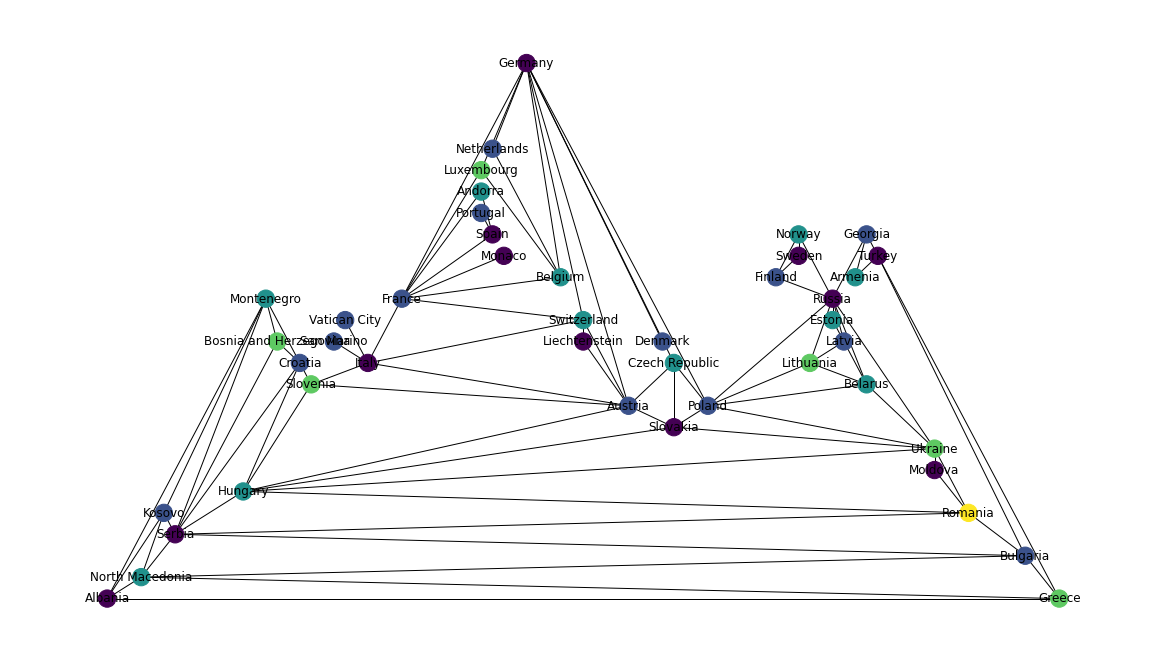

In [121]:
node_colors = nx.greedy_color(G)
color_map = []
for node in G:
    color_map.append(node_colors[node])
# color_map
print('Colors:')
print(pd.Series(node_colors.values()).value_counts())

nx.draw_planar(G, node_color=color_map, with_labels=True)

#### 1d: TODO

In [17]:
# plt.figure(figsize=(16,9))
# nx.draw_planar(Europe, node_size=None, with_labels=True, edge_color=[1])
# colors = [1] * G.number_of_edges()

#### 1e

Maximum clique: {'Poland', 'Russia', 'Belarus', 'Lithuania'}


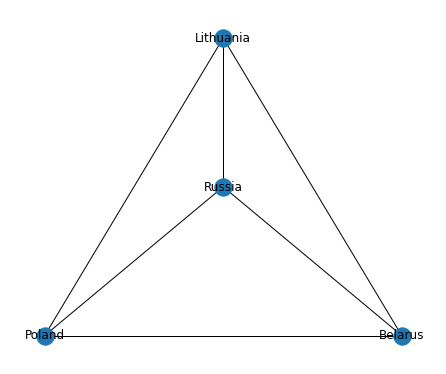

In [128]:
cliques = list(nx.find_cliques_recursive(G))
max_clique_size = 0
for element in cliques:
    max_clique_size = max(max_clique_size, len(element))
# max_clique_size
# for element in cliques:
#     if len(element) == max_clique_size:
#         print('Maximum clique:', element)
#         break

plt.figure(figsize=(6, 5))
print('Maximum clique:', clique.max_clique(G))
nx.draw_planar(G.subgraph(clique.max_clique(G)), with_labels=True)

#### 1f

Maximal independent set: ['Monaco', 'Latvia', 'Sweden', 'Hungary', 'Switzerland', 'Poland', 'Luxembourg', 'Spain', 'San Marino', 'Kosovo', 'Moldova', 'Armenia', 'Vatican City', 'Bulgaria', 'Denmark', 'Netherlands', 'Bosnia and Herzegovina']
Size: 16


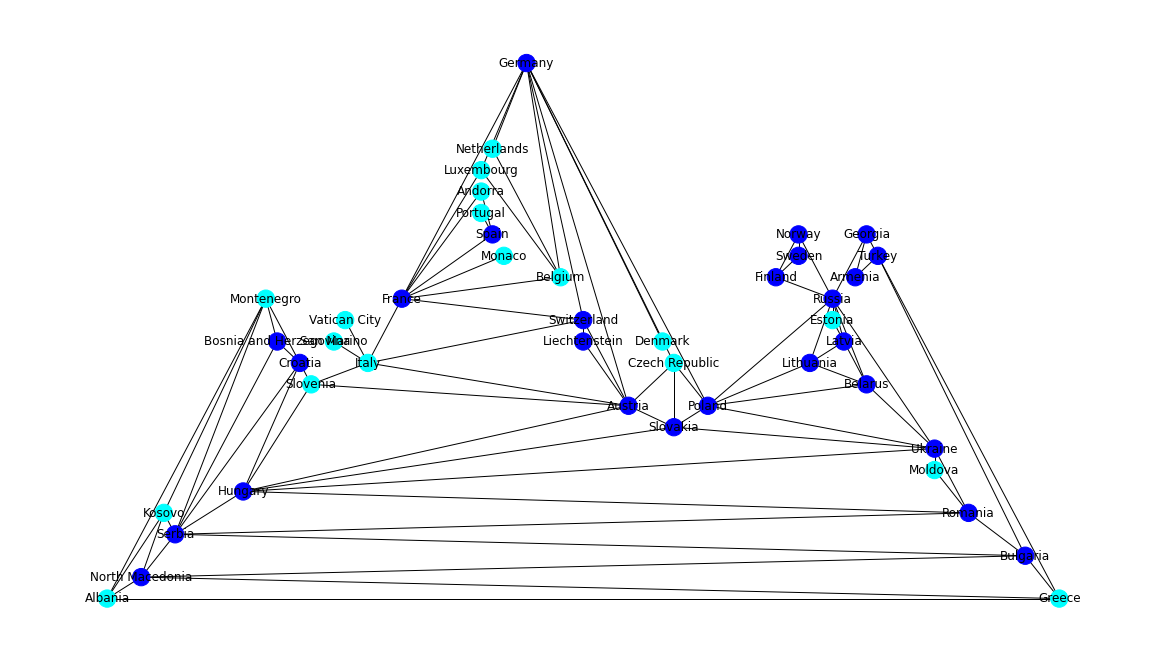

In [123]:
print('Maximal independent set:', nx.maximal_independent_set(G))
print('Size:', len(nx.maximal_independent_set(G)))

colors = list()
colors= ['cyan' if node in nx.maximal_independent_set(G) else 'blue' for node in G.nodes()]
nx.draw_planar(G, node_color=colors, with_labels=True)

#### 1g

Maximum matching: {('Bulgaria', 'North Macedonia'), ('Hungary', 'Romania'), ('Liechtenstein', 'Switzerland'), ('Italy', 'San Marino'), ('Andorra', 'France'), ('Bosnia and Herzegovina', 'Croatia'), ('Estonia', 'Russia'), ('Belarus', 'Latvia'), ('Finland', 'Norway'), ('Moldova', 'Ukraine'), ('Austria', 'Czech Republic'), ('Albania', 'Greece'), ('Lithuania', 'Poland'), ('Portugal', 'Spain'), ('Kosovo', 'Montenegro'), ('Belgium', 'Germany'), ('Armenia', 'Georgia')}
Size: 17


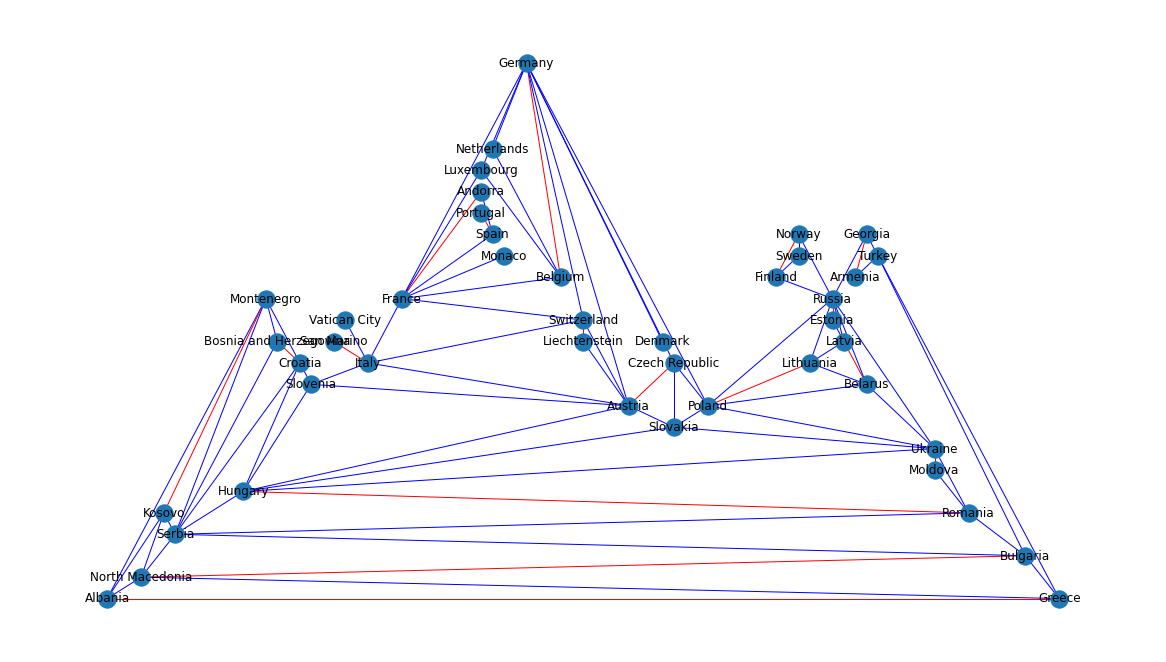

In [20]:
print('Maximum matching:', nx.maximal_matching(G))
print('Size:', len(nx.maximal_matching(G)))

edge_colors = ['red' if edge in nx.maximal_matching(G) else 'blue' for edge in G.edges()]
nx.draw_planar(G, edge_color=edge_colors, with_labels=True)

#### 1h

31
Minimum vertex cover: {'Romania', 'Bosnia and Herzegovina', 'Austria', 'Norway', 'Finland', 'Kosovo', 'Belarus', 'Germany', 'Hungary', 'Croatia', 'France', 'Estonia', 'Georgia', 'Moldova', 'North Macedonia', 'Portugal', 'Russia', 'Belgium', 'Andorra', 'Poland', 'Italy', 'Montenegro', 'Albania', 'Armenia', 'Lithuania', 'Ukraine', 'Greece', 'Liechtenstein', 'Czech Republic', 'Latvia', 'Bulgaria'}


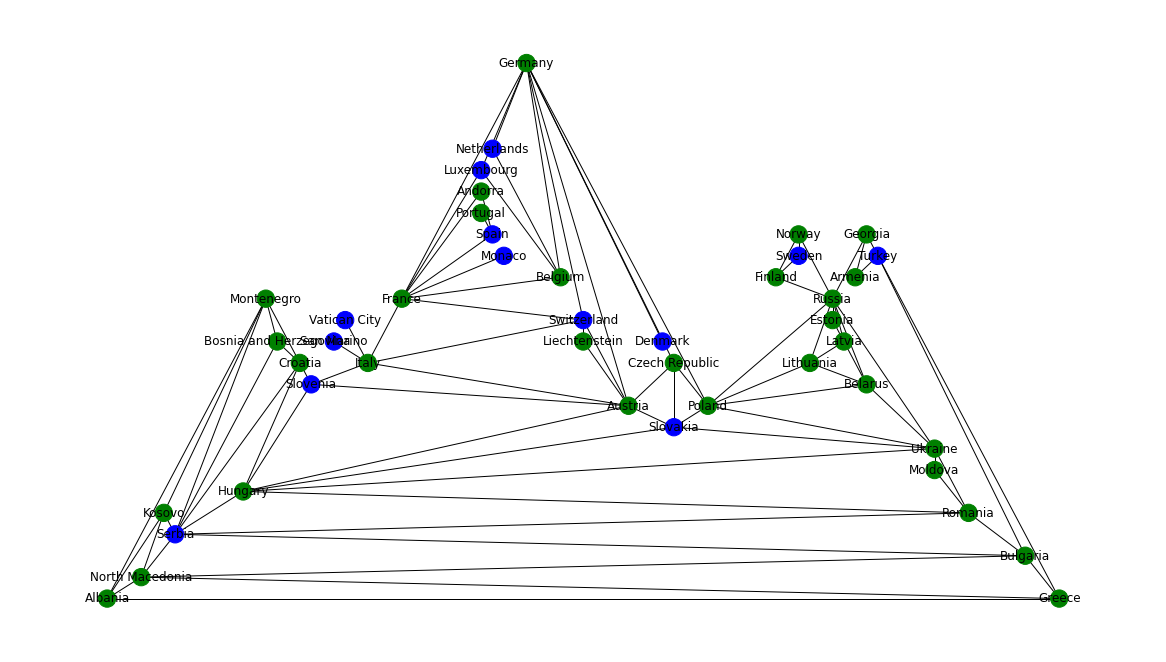

In [129]:
print(len(vertex_cover.min_weighted_vertex_cover(G)))
print('Minimum vertex cover:', vertex_cover.min_weighted_vertex_cover(G))

colors = ['green' if vertex in vertex_cover.min_weighted_vertex_cover(G) 
         else 'blue' for vertex in G.nodes()]
nx.draw_planar(G, node_color=colors, with_labels=True)

#### 1i

In [22]:
nx.is_bipartite(G)

False

In [23]:
len(G.nodes())

44

In [24]:
len(nx.maximal_matching(G)) * 2

34

 >The G graph is not bipartite, so we won't be able to use the nx.min_edge_cover() function.
 However, we can find the minimum edge cover semi-automatically by greedily extending the maximum matching (task 1g).
 There will be 44 - 34 = 10 nodes left to be covered.
 
 > Nodes to be covered: Serbia, Slovenia, Monaco, Luxembourg, Netherlands, Denmark, Sweden, Turkey, Slovakia, Vatican City

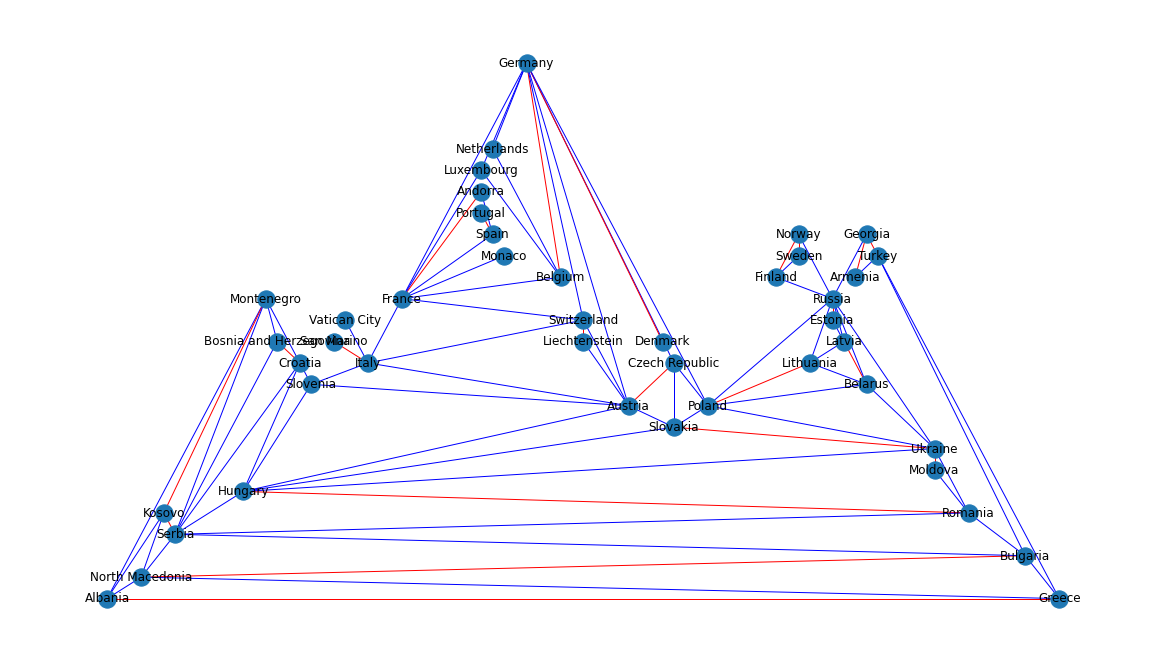

In [25]:
minimum_edge_cover = nx.maximal_matching(G)
minimum_edge_cover.update([
    ('Kosovo', 'Serbia'),
    ('Slovenia', 'Italy'),
    ('Monaco', 'France'),
    ('Luxembourg', 'Belgium'),
    ('Netherlands', 'Germany'),
    ('Denmark', 'Germany'),
    ('Norway', 'Sweden'),
    ('Georgia', 'Turkey'),
    ('Slovakia', 'Ukraine'),
    ('Vatican City', 'Italy')
])
len(minimum_edge_cover)


edge_colors = ['red' if edge in minimum_edge_cover else 'blue' for edge in G.edges()]
nx.draw_planar(G, edge_color=edge_colors, with_labels=True)

#### 1j: TODO

#### 1k: TODO

#### 1l

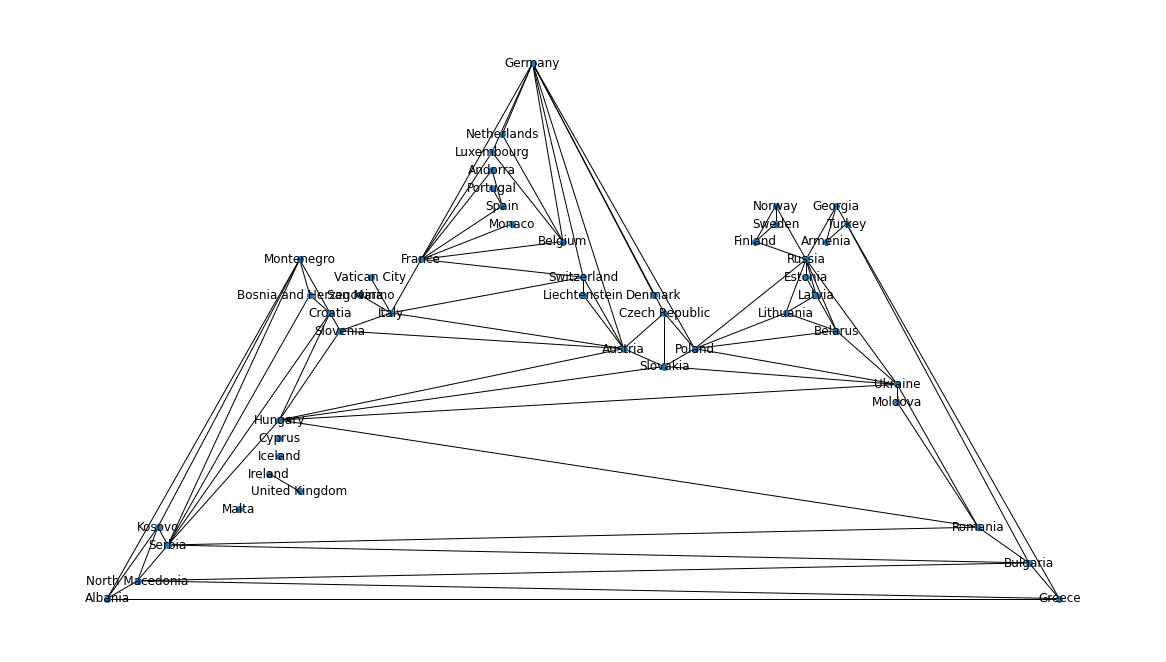

In [26]:
nx.draw_planar(Europe, node_size=None, with_labels=True)

In [27]:
bicon_components = list(nx.biconnected_components(Europe))
bicon_components

[{'Portugal', 'Spain'},
 {'Andorra', 'France', 'Spain'},
 {'Italy', 'San Marino'},
 {'Italy', 'Vatican City'},
 {'France', 'Monaco'},
 {'Denmark', 'Germany'},
 {'Finland', 'Norway', 'Russia', 'Sweden'},
 {'Albania',
  'Armenia',
  'Austria',
  'Belarus',
  'Belgium',
  'Bosnia and Herzegovina',
  'Bulgaria',
  'Croatia',
  'Czech Republic',
  'Estonia',
  'France',
  'Georgia',
  'Germany',
  'Greece',
  'Hungary',
  'Italy',
  'Kosovo',
  'Latvia',
  'Liechtenstein',
  'Lithuania',
  'Luxembourg',
  'Moldova',
  'Montenegro',
  'Netherlands',
  'North Macedonia',
  'Poland',
  'Romania',
  'Russia',
  'Serbia',
  'Slovakia',
  'Slovenia',
  'Switzerland',
  'Turkey',
  'Ukraine'},
 {'Ireland', 'United Kingdom'}]

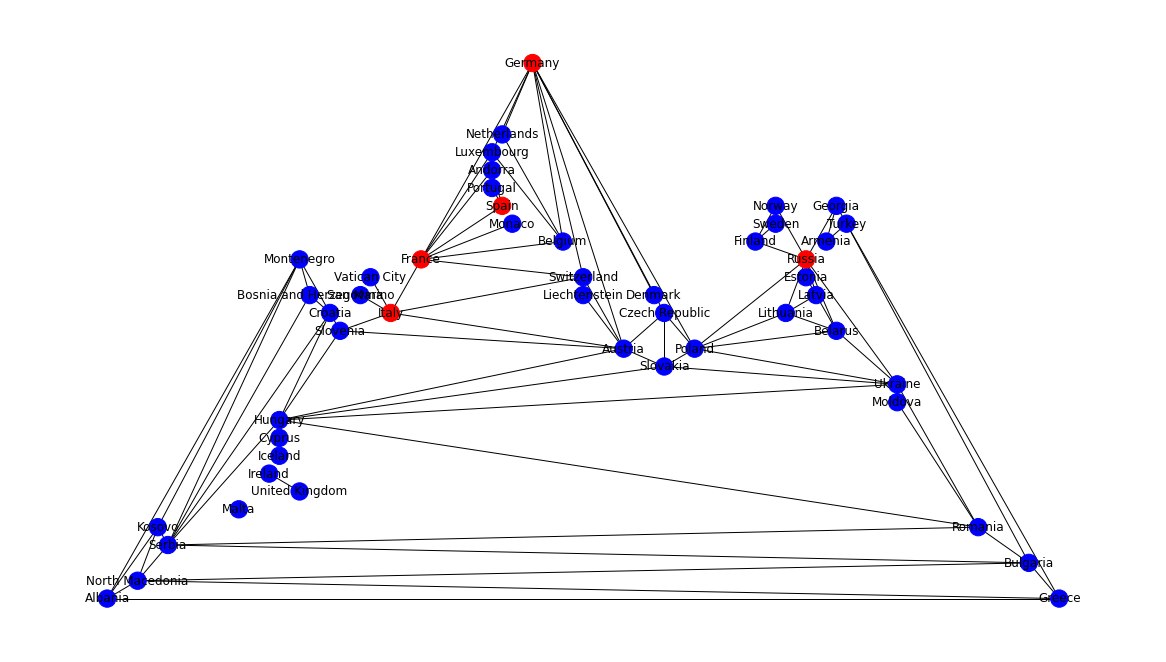

In [28]:
node_colors = ['red' if node in nx.articulation_points(Europe) else 'blue' for node in Europe.nodes()]
nx.draw_planar(Europe, node_color=node_colors, with_labels=True)

> Draw block-cut tree by hands, write down the articulation points and then connect the blocks

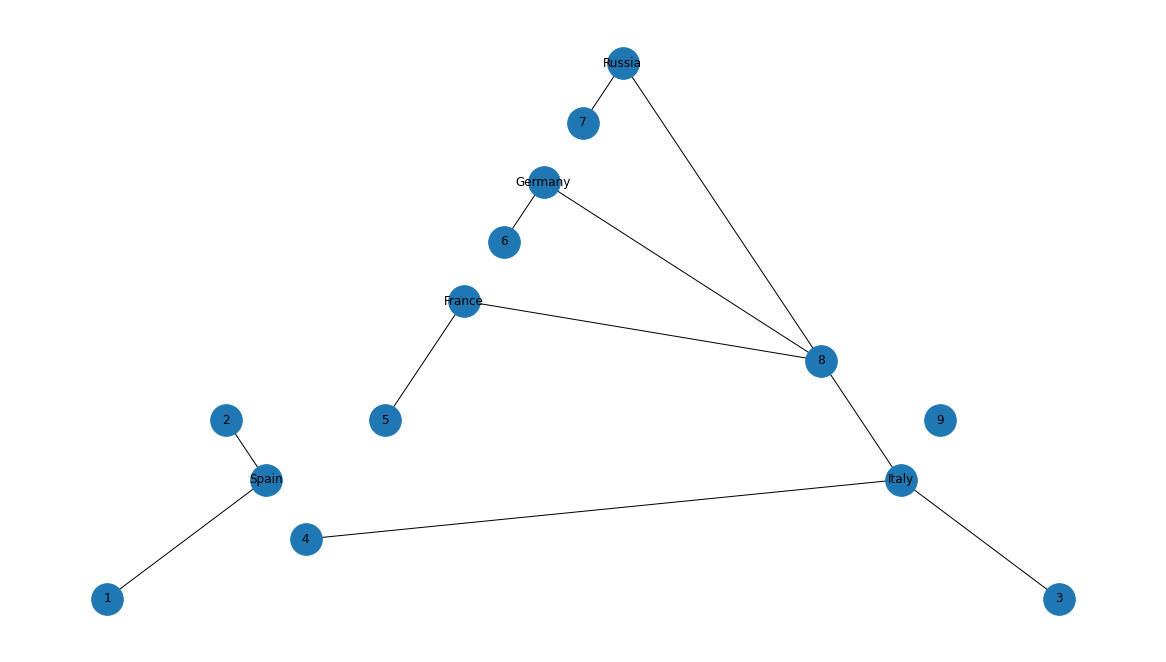

In [29]:
"""
    Add blocks (the same indexes as in bicon_components list)
"""

block_cut_tree = nx.Graph()
block_cut_tree.add_nodes_from([
    1, 2, 3, 4, 5, 6, 7, 8
    , 9, 'Spain', 'Russia', 'Italy', 'Germany', 'France'
])
block_cut_tree.add_edges_from([
    (1, 'Spain'),
    (2, 'Spain'),
    (3, 'Italy'),
    (4, 'Italy'),
    (5, 'France'),
    (6, 'Germany'),
    (7, 'Russia'),
    (8, 'Italy'),
    (8, 'France'),
    (8, 'Germany'),
    (8, 'Russia')
])

nx.draw_planar(block_cut_tree, with_labels=True, node_size=1000)

#### 1m

In [30]:
nx.is_k_edge_connected(Europe, 2)

False

'\n    Separate color for each component\n'

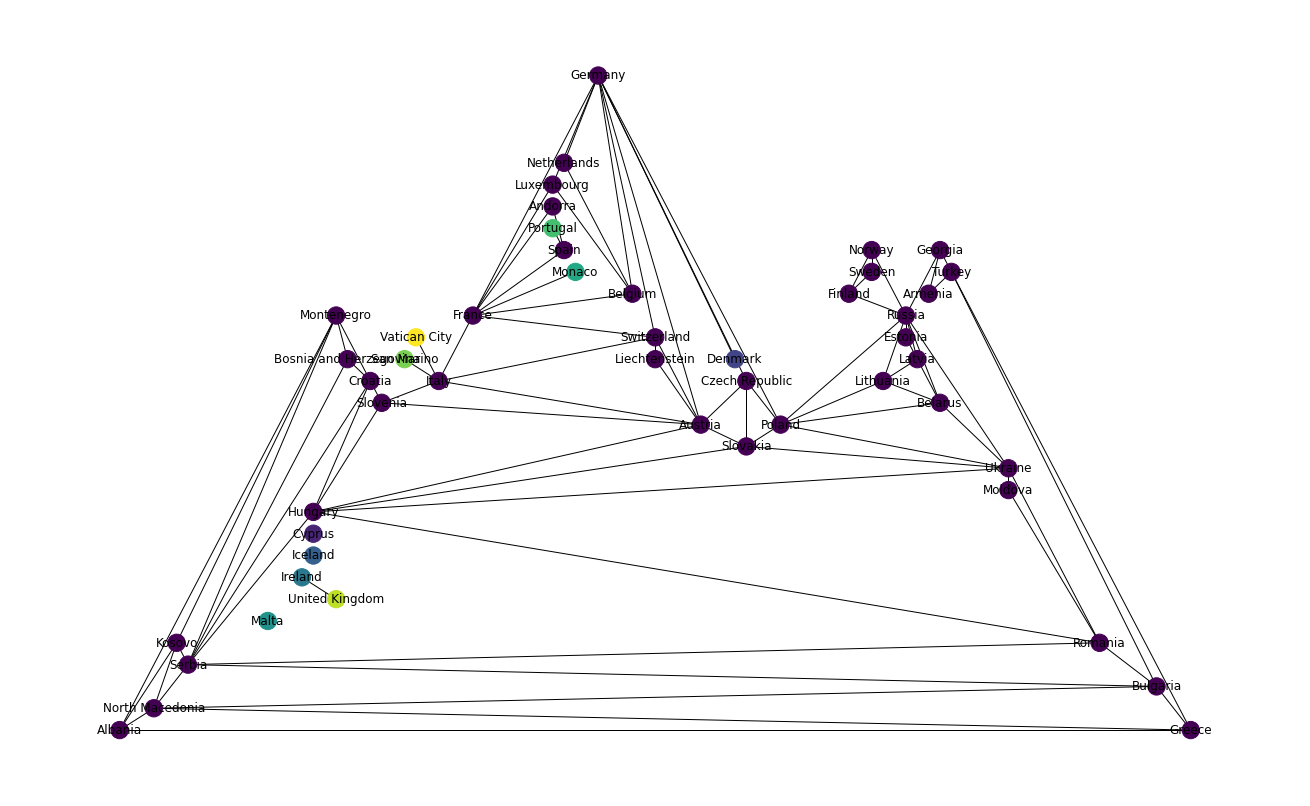

In [31]:
plt.figure(figsize=(18, 11))
node_colors = dict()
color = 0
for component in nx.k_edge_components(Europe, 2):
    for node in component:
        node_colors[node] = color
    color += 1 
colors = list()
nx.draw_planar(Europe, node_color=[node_colors[node] for node in Europe.nodes()]
               , with_labels=True)
"""
    Separate color for each component
"""


#### 1n

34

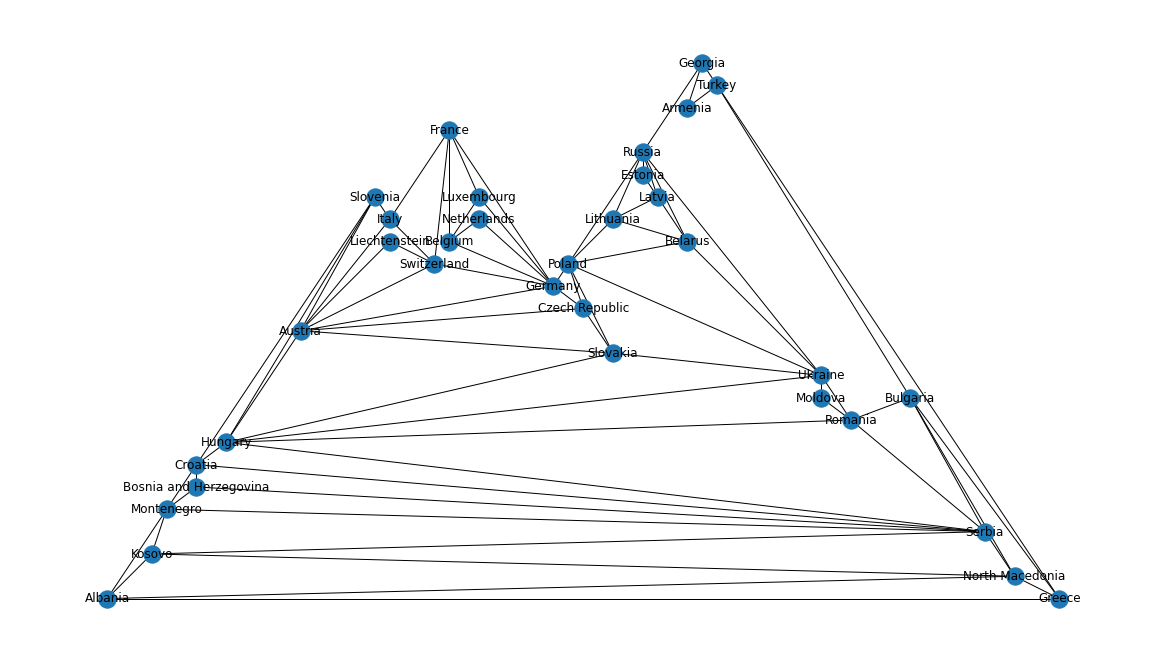

In [32]:
plt.figure(figsize=(16, 9))
largest_bicon_comp = Europe.subgraph(max(nx.biconnected_components(G), key=len))
nx.draw_planar(largest_bicon_comp,
               with_labels=True)
len(largest_bicon_comp)

In [33]:
# plt.figure(figsize=(16, 9))


# colors = dict()
# color = 0
# for component in nx.k_components(largest_bicon_comp)[3]:
#     for vertex in component:
#         colors[vertex] = color
#     color += 1
# for node in largest_bicon_comp.nodes():
#     if node not in colors.keys():
#         colors[node] = color
#         color += 1
# nx.draw_planar(largest_bicon_comp,
#                node_color=[colors[node] for node in largest_bicon_comp.nodes()],
#                with_labels=True)

#### 1o

In [39]:
!pip install geopy

     |████████████████████████████████| 118 kB 1.4 MB/s eta 0:00:01
You should consider upgrading via the '/Users/maksim/JupyterProjects/discrete_maths/envi/bin/python -m pip install --upgrade pip' command.


In [97]:
import geopy.distance as gd

Europe_weighted = nx.Graph()
Europe_weighted.add_nodes_from(list(Europe.nodes()))
# print(len(Europe_weighted.nodes))
capitals_coordinates = pd.read_csv('coordinates.csv')
capitals_coordinates['coords'] = list(zip(capitals_coordinates.latitude,
                                          capitals_coordinates.longitude))
count = 0
for edge in Europe.edges():
    left = edge[0]
    right = edge[1]

    coords_left = capitals_coordinates[capitals_coordinates.country == left].coords.values[0]
    coords_right = capitals_coordinates[capitals_coordinates.country == right].coords.values[0]

    distance = round(gd.geodesic(coords_left, coords_right).km, 2)
    Europe_weighted.add_edge(left, right, weight=distance)

In [131]:
# pos = nx.planar_layout(Europe)
# labels = nx.get_edge_attributes(Europe_weighted,'weight')

# nx.draw(Europe_weighted, pos=pos, with_labels=True)
# nx.draw_networkx_edge_labels(Europe_weighted, pos, edge_labels=labels)

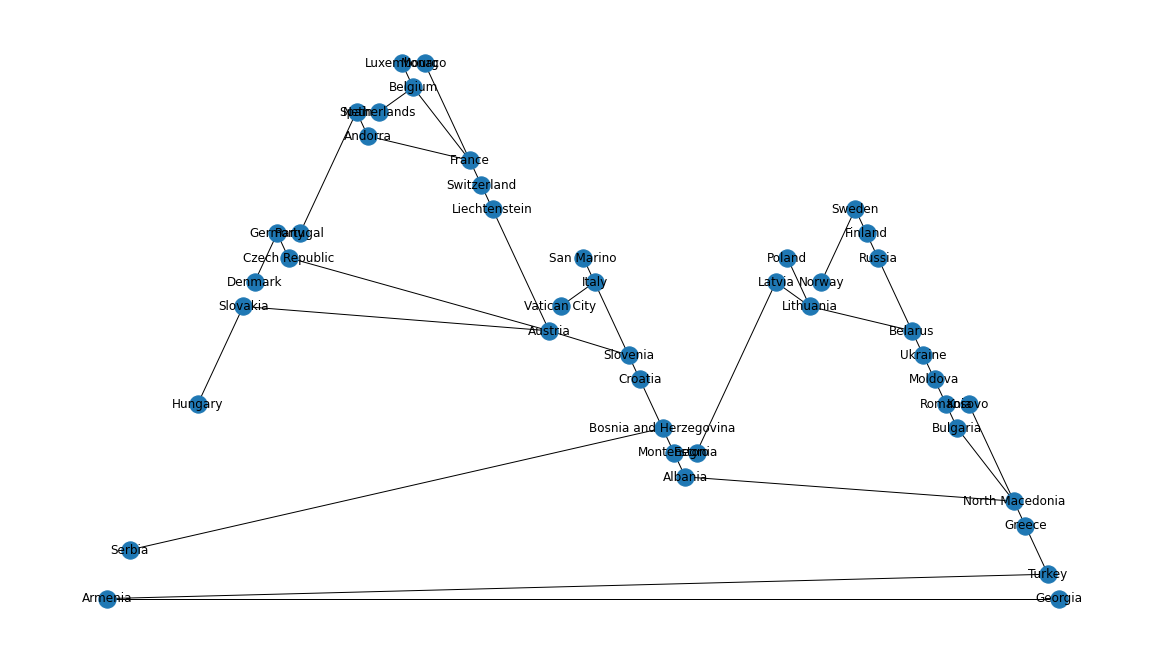

In [132]:
Gw = Europe_weighted.subgraph(max(nx.connected_components(Europe_weighted)))
nx.draw_planar(nx.minimum_spanning_tree(Gw), with_labels=True)